#Week 3 Exercise 3.2 Author: Rex Gayas Course & Section: DSC320-T301 Math for Data Science (2243-1) Date: 17 December 2023

US POPULATION GROWTH

In [32]:
# Solution 1a
import pandas as pd

# Location of the relevant file path
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Math for Data Science\\Week 3\\week3data\\week3data\\us_pop_data.csv"

# Load the US population data
us_pop_data = pd.read_csv(file_path)

# Calculate the number of years since 1790 and the population in millions
us_pop_data['Years_since_1790'] = us_pop_data['year'] - 1790
us_pop_data['Population_Millions'] = us_pop_data['us_pop'] / 1e6

# Display the first few rows of the updated DataFrame
print(us_pop_data.head())


   year    us_pop  Years_since_1790  Population_Millions
0  1790   3929326                 0             3.929326
1  1800   5308483                10             5.308483
2  1810   7239881                20             7.239881
3  1820   9638453                30             9.638453
4  1830  12866020                40            12.866020


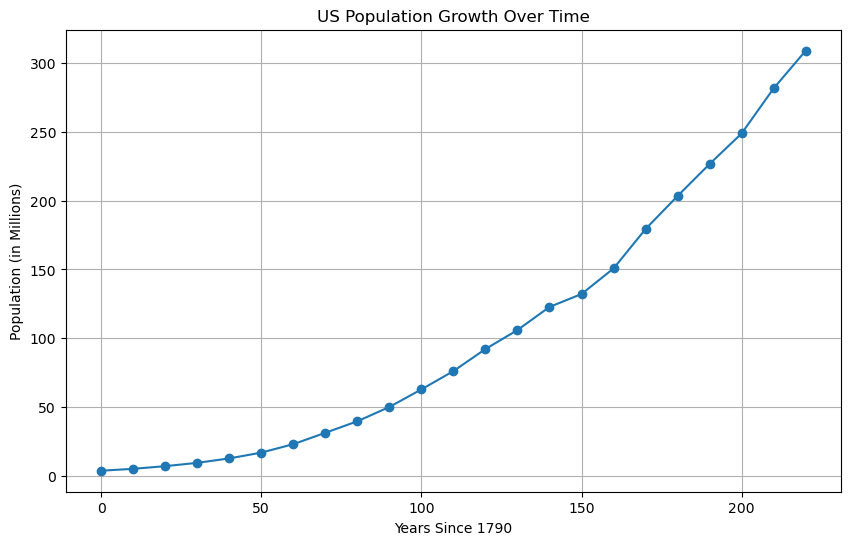

In [45]:
# Solution to 1b
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(us_pop_data['Years_since_1790'], us_pop_data['Population_Millions'], marker='o')
plt.title('US Population Growth Over Time')
plt.xlabel('Years Since 1790')
plt.ylabel('Population (in Millions)')
plt.grid(True)
plt.show()


In [41]:
# Solution to 1c
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the data for linear regression
X = us_pop_data[['Years_since_1790']]  # Independent variable
y = us_pop_data['Population_Millions']  # Dependent variable

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the population and calculate the R²-value
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print("R²-value for the linear regression model:", r2)


R²-value for the linear regression model: 0.9192437447080442


In [42]:
# Solution to 1d
import numpy as np

# Square the 'Years_since_1790' column and add it as a new column
us_pop_data['Squared_Years'] = np.square(us_pop_data['Years_since_1790'])

# Display the first few rows of the DataFrame with the new column
print(us_pop_data.head())


   year    us_pop  Years_since_1790  Population_Millions  Squared_Years
0  1790   3929326                 0             3.929326              0
1  1800   5308483                10             5.308483            100
2  1810   7239881                20             7.239881            400
3  1820   9638453                30             9.638453            900
4  1830  12866020                40            12.866020           1600


In [43]:
# Solution to 1e
# Create the linear regression model with the squared years
X_squared = us_pop_data[['Squared_Years']]
model_squared = LinearRegression()
model_squared.fit(X_squared, y)

# Predict the population with the new model and calculate the R²-value
y_pred_squared = model_squared.predict(X_squared)
r2_squared = r2_score(y, y_pred_squared)

print("R²-value for the linear regression model with squared years:", r2_squared)


R²-value for the linear regression model with squared years: 0.9984915694986646


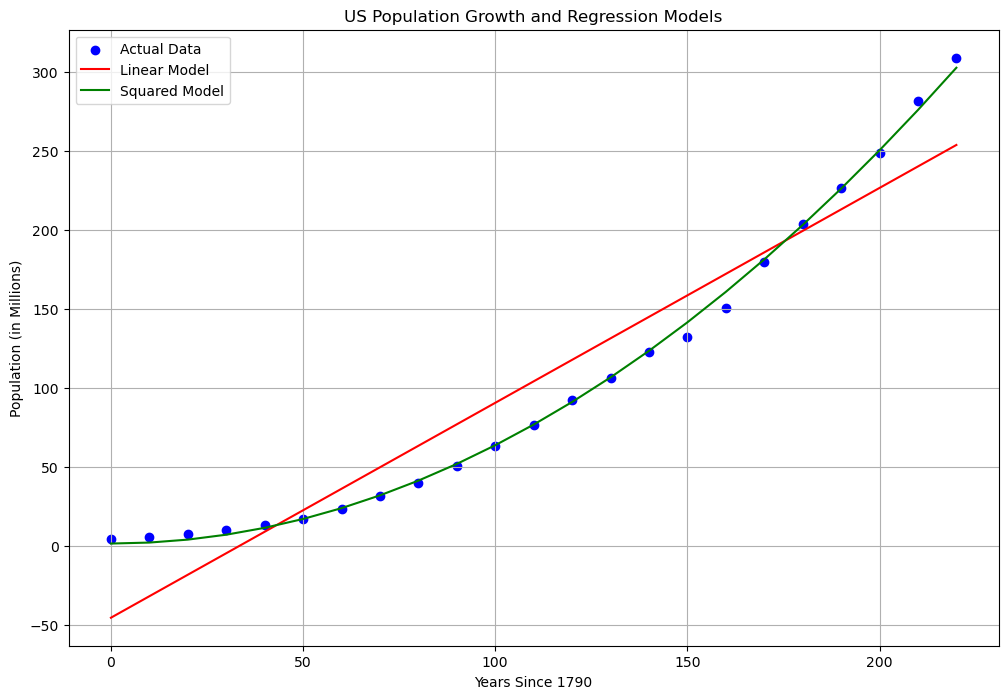

In [37]:
# Solution to 1f
# Plot the original data and the models
plt.figure(figsize=(12, 8))
plt.scatter(us_pop_data['Years_since_1790'], y, color='blue', label='Actual Data')
plt.plot(us_pop_data['Years_since_1790'], y_pred, color='red', label='Linear Model')
plt.plot(us_pop_data['Years_since_1790'], y_pred_squared, color='green', label='Squared Model')

plt.title('US Population Growth and Regression Models')
plt.xlabel('Years Since 1790')
plt.ylabel('Population (in Millions)')
plt.legend()
plt.grid(True)
plt.show()


The plot generated shows the US population growth and the regression models. The green line representing the squared model seems to fit the data points more closely compared to the red line of the linear model, which is consistent with the calculated R²-values.The squared model has an R²-value of 0.9985, which is very close to 1. Graphically and numerically, this suggests an excellent fit, with the model explaining nearly all of the variance in the data.

CUSTOMER SPENDING DATA

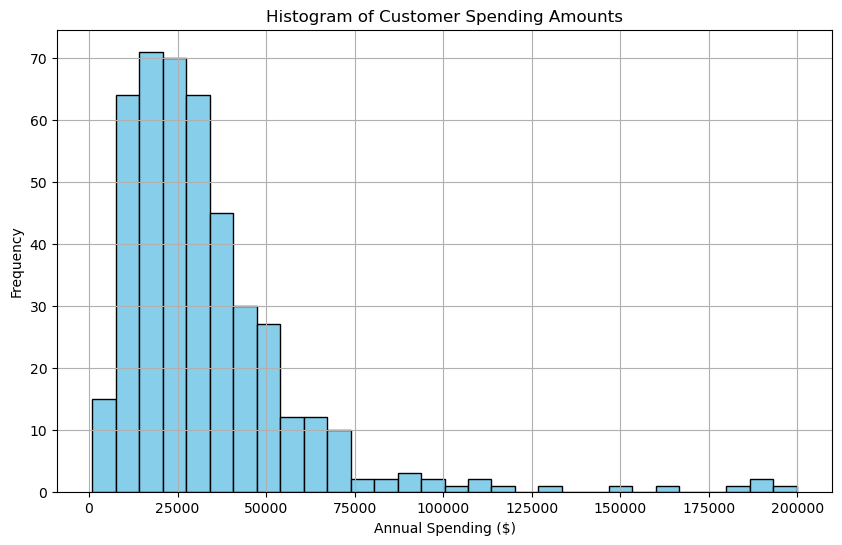

In [46]:
# Solution to 2a
import pandas as pd
import matplotlib.pyplot as plt

# Location of the relevant file path
customer_data_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Math for Data Science\\Week 3\\week3data\\week3data\\customer_spending.csv"

# Load the customer spending data
customer_spending_data = pd.read_csv(customer_data_path)

# Plot the histogram of customer spending amounts
plt.figure(figsize=(10, 6))
plt.hist(customer_spending_data['ann_spending'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Customer Spending Amounts')
plt.xlabel('Annual Spending ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [44]:
# Solution to 2b
import numpy as np

# Apply a log transformation to the 'ann_spending' column
customer_spending_data['Log_Ann_Spending'] = np.log(customer_spending_data['ann_spending'])

# Display the first few rows with the new log-transformed column
print(customer_spending_data.head())


   ann_spending  Log_Ann_Spending
0         34112         10.437405
1         33266         10.412291
2         36610         10.508077
3         27381         10.217605
4         46100         10.738568


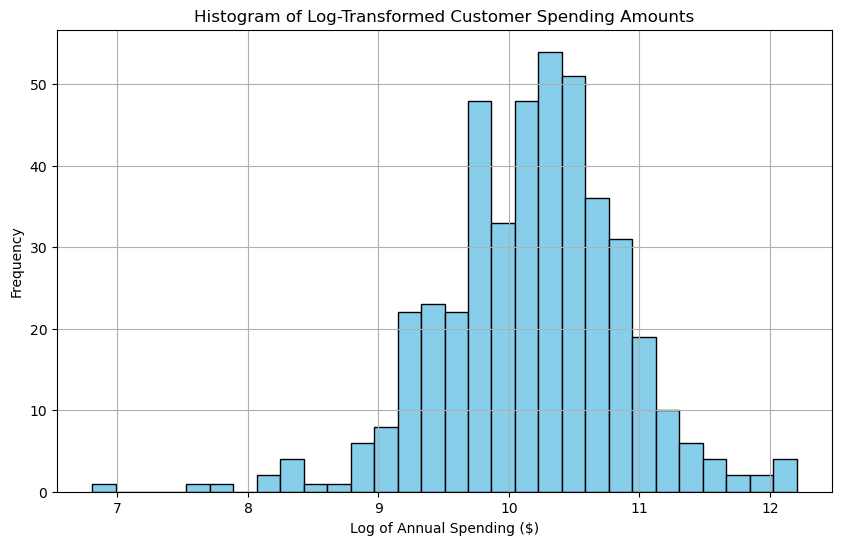

In [40]:
# Solution to 2c
# Plot the histogram of log-transformed customer spending amounts
plt.figure(figsize=(10, 6))
plt.hist(customer_spending_data['Log_Ann_Spending'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Log-Transformed Customer Spending Amounts')
plt.xlabel('Log of Annual Spending ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Solution to 2d

The first generated histogram of customer spending amounts shows a positively skewed distribution with a long tail to the right, indicating that while most customers spend within a lower range, there are a few with significantly higher spending. This skewness can complicate the modeling process, especially for ones that assume normality.

The histogram of the log-transformed spending displays a more symmetrical distribution, closely resembling a normal distribution. The log transformation reduces the skewness and makes the data more suitable for statistical models that assume normality.

As noted from Week 3's articles, applying a log transformation helps to stabilize the variance across the data range and makes the model less sensitive to outliers. Normalizing the distribution is useful for valid statistical inference. Patterns in the data are more interpretable which improves the accuracy and robustness of statistical models. 